# Convolutional NN

In [1]:
import numpy as np
import gzip
import os
import pickle
from matplotlib import pyplot

from src.si.data import Dataset
from src.si.util.util import to_categorical

Load the MNIST dataset

In [2]:
def load_mnist(sample_size=None):
    DIR = os.path.dirname(os.path.realpath('.'))
    filename = os.path.join(DIR, 'datasets/mnist.pkl.gz')
    f = gzip.open(filename, 'rb')
    data = pickle.load(f, encoding='bytes')
    (x_train, y_train), (x_test, y_test) = data
    if sample_size:
        return Dataset(x_train[:sample_size],y_train[:sample_size]),Dataset(x_test,y_test)
    else:
        return Dataset(x_train,y_train),Dataset(x_test,y_test)

In [3]:
train,test = load_mnist(500)

In [4]:
def preprocess(train):
    # reshape and normalize input data 
    train.X = train.X.reshape(train.X.shape[0], 28, 28, 1)
    train.X = train.X.astype('float32')
    train.X /= 255
    train.Y = to_categorical(train.Y)

In [5]:
preprocess(train)
preprocess(test)

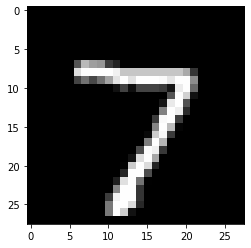

In [6]:
def plot_img(img,shape=(28,28)):
    pic = (img*255).reshape(shape)
    pic = pic.astype('int')
    pyplot.imshow(pic, cmap=pyplot.get_cmap('gray'))
    pyplot.show()

plot_img(test.X[0])

In [7]:
from src.si.supervised.nn import NN, Dense, Activation, Conv2D, Flatten
from src.si.util.activation import Tanh, Sigmoid

Build the model

In [8]:
net = NN(epochs=500,lr=0.1,verbose=True)
net.add(Conv2D((28, 28, 1), (3, 3), 1))
net.add(Activation(Tanh()))
net.add(Flatten())                     
net.add(Dense(26*26*1, 100))
net.add(Activation(Tanh()))
net.add(Dense(100, 10))                
net.add(Activation(Sigmoid()))

Train the model

In [9]:
net.fit(train)

epoch 1/500 error=0.33371471627117033
epoch 2/500 error=0.3233838236264233
epoch 3/500 error=0.3141021994401244
epoch 4/500 error=0.30570651823100436
epoch 5/500 error=0.29803376575855706
epoch 6/500 error=0.2909103890180553
epoch 7/500 error=0.2841783745857145
epoch 8/500 error=0.27772122595981114
epoch 9/500 error=0.2714660128044749
epoch 10/500 error=0.2653720286391349
epoch 11/500 error=0.2594184548858055
epoch 12/500 error=0.2535954460282501
epoch 13/500 error=0.24789871652743872
epoch 14/500 error=0.2423265824369078
epoch 15/500 error=0.23687847337474185
epoch 16/500 error=0.23155424272518438
epoch 17/500 error=0.2263538779569137
epoch 18/500 error=0.22127739683911685
epoch 19/500 error=0.21632482313049645
epoch 20/500 error=0.21149619223727947
epoch 21/500 error=0.20679156450761002
epoch 22/500 error=0.20221103547983205
epoch 23/500 error=0.19775473698764948
epoch 24/500 error=0.19342282513584746
epoch 25/500 error=0.18921545301836162
epoch 26/500 error=0.1851327284009732
epoch 

In [10]:
out = net.predict(test.X[0:3])
print("\n")
print("predicted values : ")
print(np.round(out), end="\n")
print("true values : ")
print(test.Y[0:3])



predicted values : 
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
true values : 
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [11]:
conv = net.layers[0]

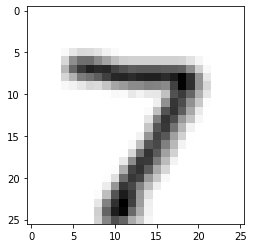

In [12]:
plot_img(conv.forward(test.X[:1]),shape=(26,26))

Add maxpooling layer

In [13]:
from src.si.supervised.nn import MaxPooling

net = NN(epochs=500,lr=0.1,verbose=True)
net.add(Conv2D((28, 28, 1), (3, 3), 1))  # sairá como 26*26*1
net.add(Activation(Tanh()))
net.add(MaxPooling((2, 2)))
net.add(Activation(Tanh()))
net.add(Flatten())
net.add(Dense(13*13*1, 100))
net.add(Activation(Tanh()))
net.add(Dense(100, 10))
net.add(Activation(Sigmoid()))

Train model again

epoch 1/500 error=0.3253500977381234
epoch 2/500 error=0.31851187689102484
epoch 3/500 error=0.31186608330036764
epoch 4/500 error=0.3052848060804809
epoch 5/500 error=0.29867442345596124
epoch 6/500 error=0.29199821248621105
epoch 7/500 error=0.2852609691784278
epoch 8/500 error=0.27847951277191957
epoch 9/500 error=0.2716573341044858
epoch 10/500 error=0.2648171217031898
epoch 11/500 error=0.2579918682737296
epoch 12/500 error=0.25119055525867623
epoch 13/500 error=0.24446939304649656
epoch 14/500 error=0.23781861053961792
epoch 15/500 error=0.23129420800621142
epoch 16/500 error=0.22496628168534402
epoch 17/500 error=0.2188092839575834
epoch 18/500 error=0.21288005840792024
epoch 19/500 error=0.20711764173003333
epoch 20/500 error=0.20150380262223716
epoch 21/500 error=0.19603161881518755
epoch 22/500 error=0.19065277425663002
epoch 23/500 error=0.18534615030032708
epoch 24/500 error=0.18009973020026523
epoch 25/500 error=0.17491227223644976
epoch 26/500 error=0.16978093242140924
ep

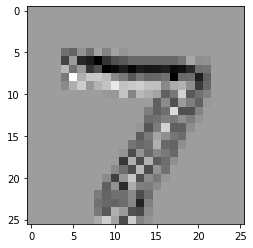

In [14]:
net.fit(train)

conv = net.layers[0]

plot_img(conv.forward(test.X[:1]),shape=(26,26))